In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

/home/lgervasoni/anaconda2/envs/urbansprawl/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from analysis import Analysis
city_ref = 'grenoble_france' 
#city_ref = 'avila_spain'

city = Analysis(city_ref, pois_shp_path = "cities/"+city_ref+"/full_uses.shp", grid_step=.005)

('Bounding box:', [45.113017726416615, 5.573125356566398, 45.243980680751875, 5.9029513504478865])


In [3]:
city.pois.head()

Querying locally for `['pois']`
Found ['pois'] stored locally


,category,key,lat,lon,value
id,,,,,
66383339,activity,inferred,45.148746,5.679552,construction
66384600,activity,inferred,45.149061,5.679569,construction
66388474,activity,inferred,45.149024,5.679637,construction
66388813,activity,inferred,45.148673,5.679924,construction
355175791,activity,inferred,45.151450,5.680675,construction


In [4]:
city.kde

Querying locally for `['activity_0_005', 'residential_0_005']`
`['activity_0_005', 'residential_0_005']` is/are not stored locally. Determining it/them through `get_grid_all_kde` method
Saving data for `['activity_0_005', 'residential_0_005']` at `/home/lgervasoni/urbansprawl/urban_analysis/hdfs_store/grenoble_france.h5`
The data has been stored locally with success


{'activity':               0             1             2             3             4   \
 0   1.183227e-02  2.626191e-02  6.699255e-02  1.551312e-01  2.765457e-01   
 1   2.349357e-01  4.792473e-01  9.566246e-01  1.577957e+00  1.856976e+00   
 2   1.310927e+00  2.956750e+00  5.950232e+00  9.096239e+00  9.382461e+00   
 3   2.322147e+00  5.688473e+00  1.132932e+01  1.650517e+01  1.613902e+01   
 4   1.444681e+00  3.429633e+00  6.197600e+00  8.225453e+00  7.508035e+00   
 5   2.863544e-01  6.187074e-01  9.655610e-01  1.115818e+00  9.220832e-01   
 6   1.539867e-02  3.067673e-02  4.186512e-02  4.149678e-02  3.020302e-02   
 7   2.049538e-04  3.879812e-04  4.816476e-04  4.175657e-04  2.651612e-04   
 8   6.501469e-07  1.195256e-06  1.398324e-06  1.097949e-06  6.328664e-07   
 9   2.000712e-08  8.615453e-08  2.253295e-07  3.682330e-07  8.801916e-07   
 10  5.889178e-06  2.572432e-05  6.762088e-05  1.071567e-04  1.078623e-04   
 11  4.068530e-04  1.777161e-03  4.671530e-03  7.397278e-03  7.1

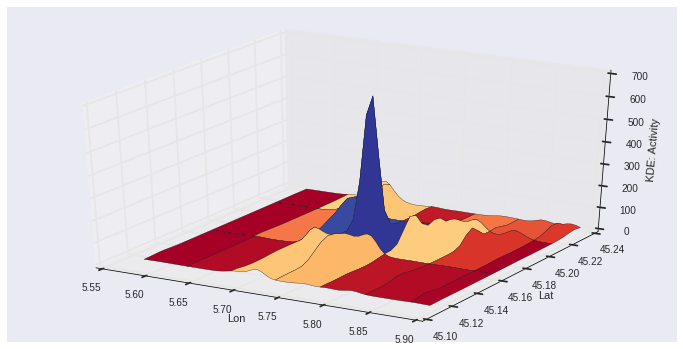

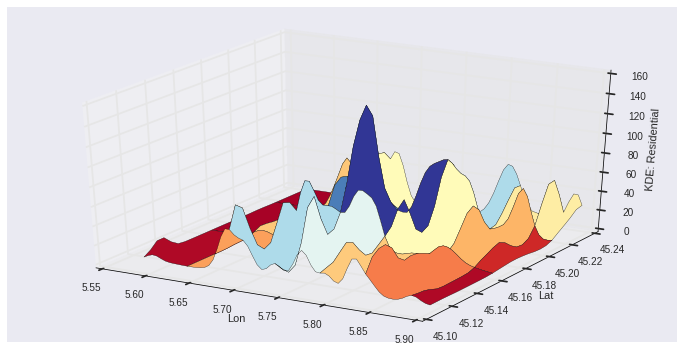

In [5]:
xx, yy = city.grid

import plots
figsize = (12,6)
plots.plot_(xx,yy,city.f_kde_act,'KDE: Activity', figsize)
plots.plot_(xx,yy,city.f_kde_res,'KDE: Residential', figsize)

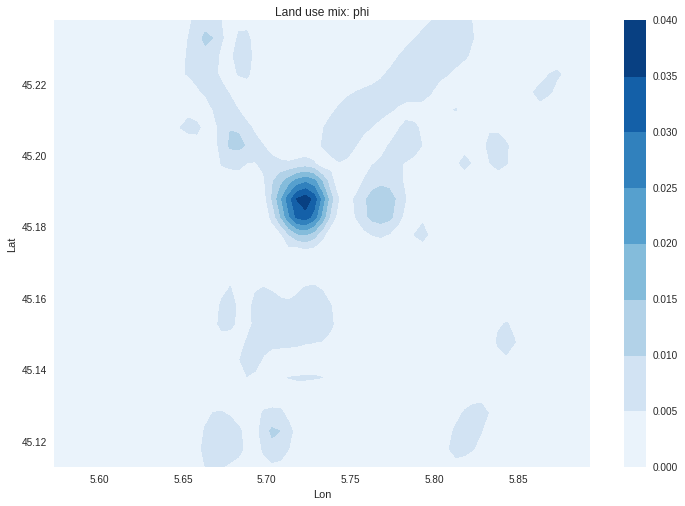

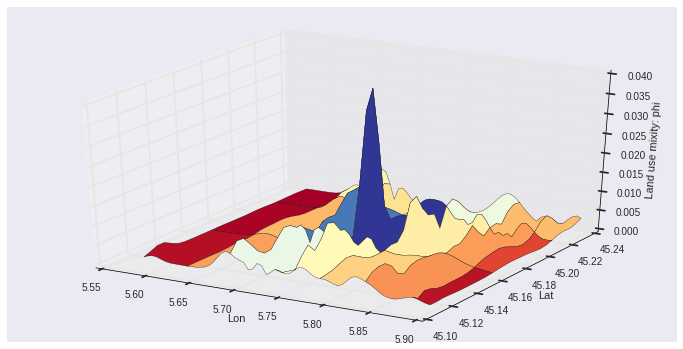

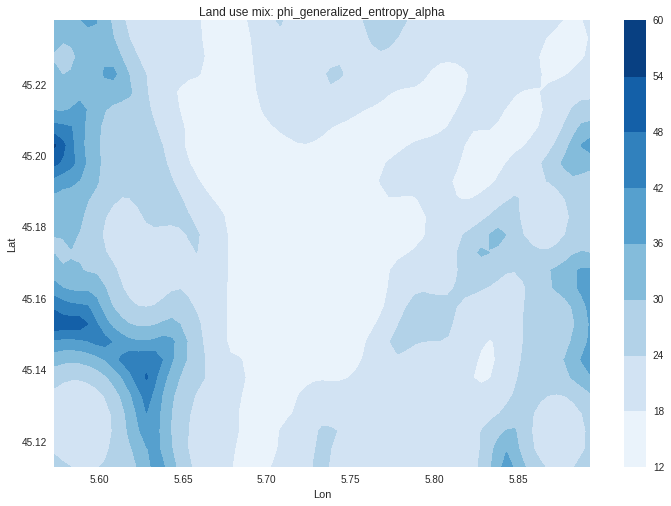

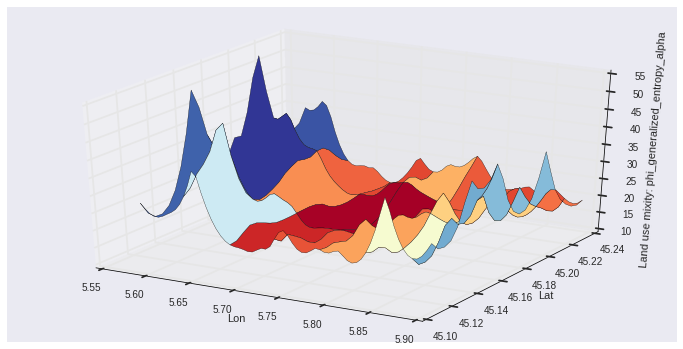

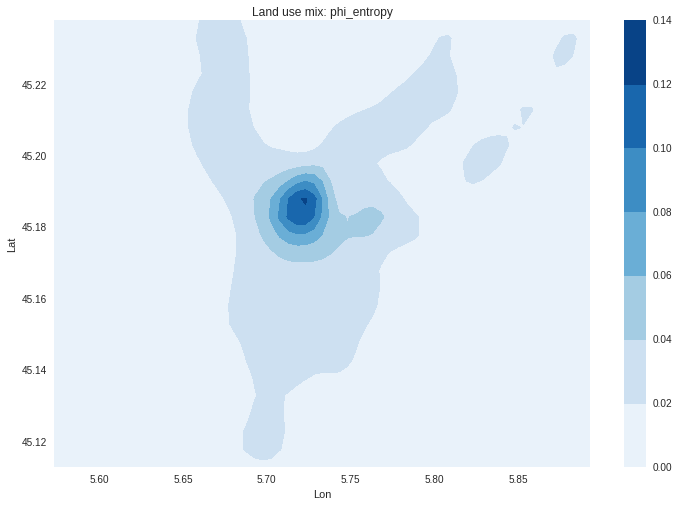

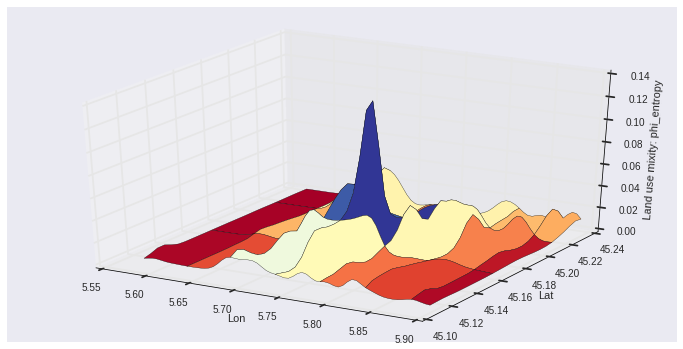

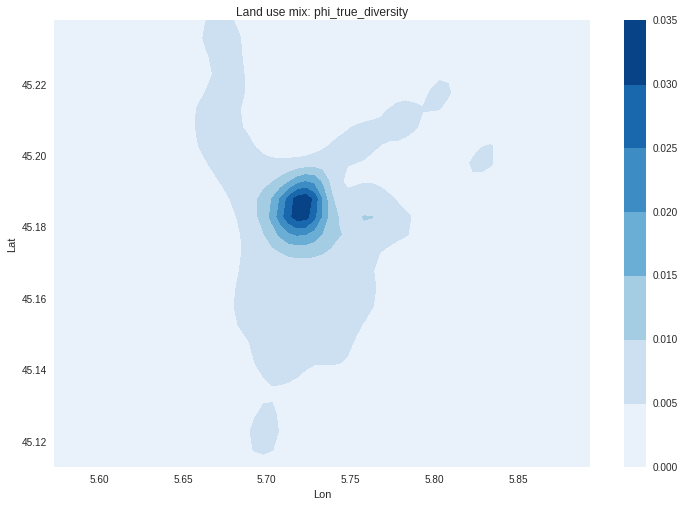

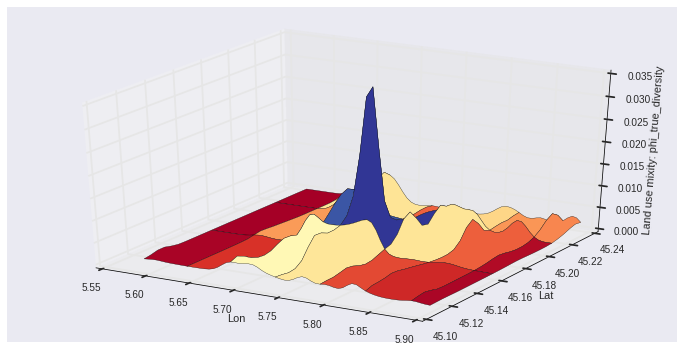

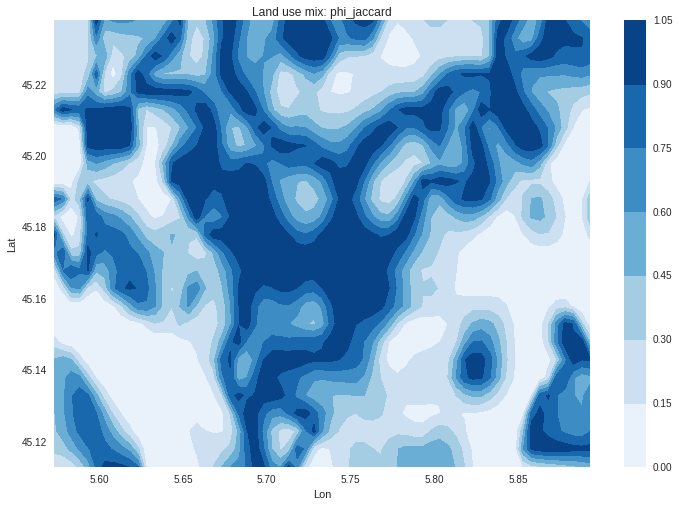

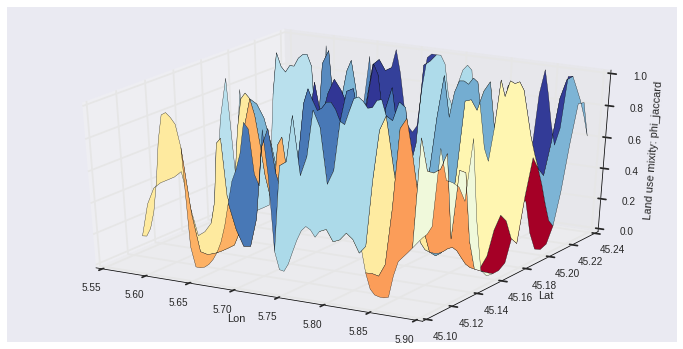

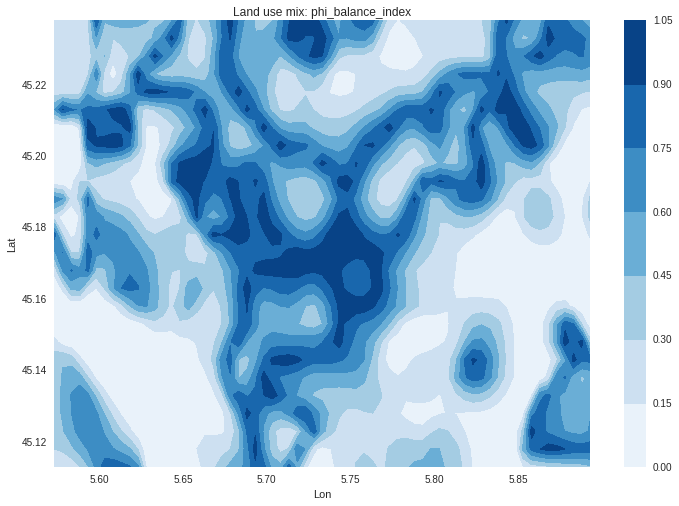

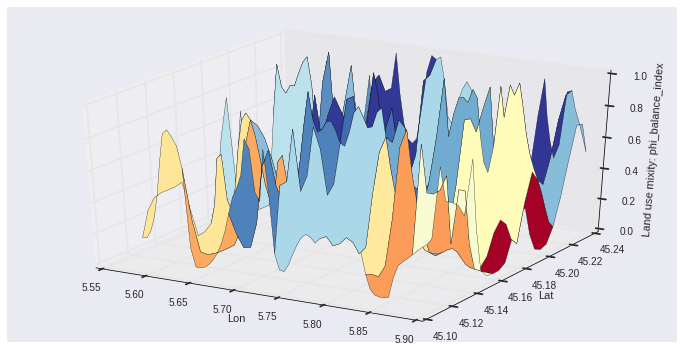

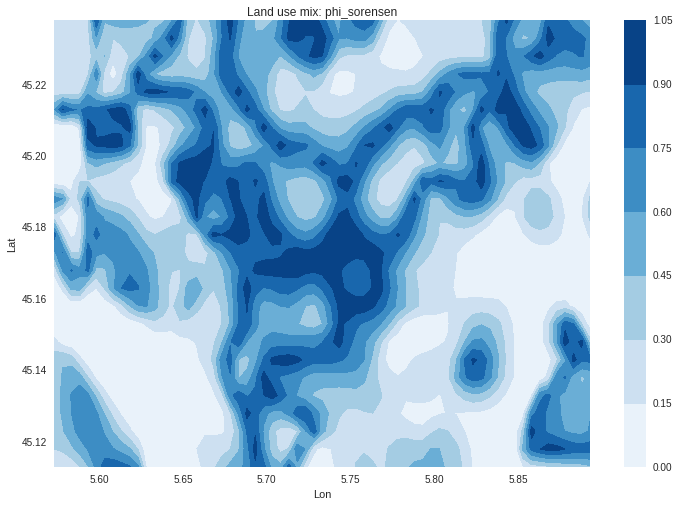

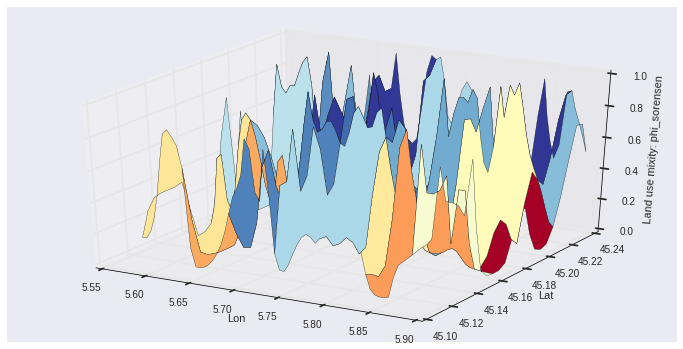

In [16]:
###
import lu_mix
lu_mix_metrics = lu_mix.get_phi_metrics()
lu_mix.normalisation_max = False # True

for i in lu_mix_metrics: # Plot all metrics
    city._f_lu_mix_grid = None
    city._phi_metric = i
    plots.plot_contour(xx,yy,city.f_lu_mix_grid,"Land use mix: "+i)
    plots.plot_(xx,yy,city.f_lu_mix_grid,'Land use mixity: '+i, figsize)

In [7]:
city.lu_mix

0.30890297330420308

In [8]:
city.moran

{'activity': 0.071022173883851458, 'residential': 0.10377137505930688}

In [9]:
city.relative_entropy

{'activity': 0.8347843470359757, 'residential': 0.91987412549031378}

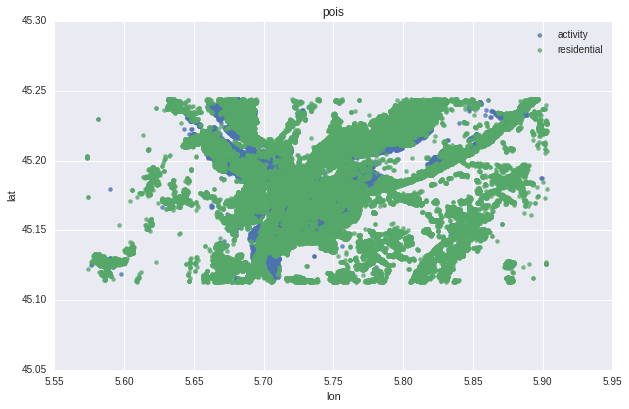

In [10]:
%matplotlib inline
city.scatter_pois(overlap=True)